# Inferential Statistics-IBM HR Analytics Employee Attrition & Performance

In [1]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


from plotly import __version__
from plotly import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Read the file
df = pd.read_csv('C:/users/eturk/Data_Science/Capstone_Project-IBM_HR_Analytics/data/HR-Employee-Attrition.csv')

In [3]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [4]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [5]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)

In [6]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

## Hypothesis Testing (Examining Attrition in Gender throughout the company)

### 1. Selecting appropriate test

In [145]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


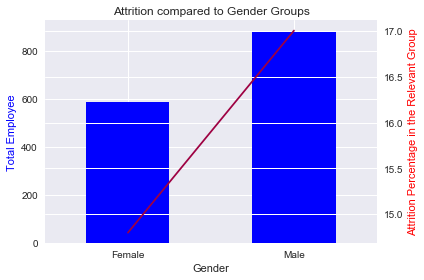

In [146]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

Since the rate of attrition for two groups is compared, a two-proportion z-test is appropriate. Central Limit Theorem (CLT) states that regardless of the population, the distribution of sample averages tends to be normal. This holds for sample sizes greater than or equal to 30. Since the size of the data is big enough and 'female' and 'male' attrition  randomly to the resumes when presented to the employer, CLT could be applied here assuming that samples are respresentative of the population.

### 2. The Null and Alternate Hypotheses

As observed above, it is obvious that male attrition is more than female's attrition but is the difference significant? Here is the important point to define the null and alternative hypothesis: 

In the context of provided information, the alternative hypothesis assumes that male attrition is pervasive enough to be a factor in attrition throughout the company.

Null Hypothesis: There is no difference in the proportion of attrition for male and female employees in the company.

$$H_0: \hat p_{male\_attrition} - \hat p_{female\_attrition} = 0$$

Alternative Hypothesis: There is a significant difference in the proportion of attrition for male and female employees in the company.

$$H_a: {\hat p_{male\_attrition}} - {\hat p_{female\_attrition}} \neq 0$$
Significance Level: 95% Confidence:

### 3. The Frequentist Statistical Approach 

In [147]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


**z-score**

In [148]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


**p-value**

In [149]:
# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:0.2587903704911598


**Margin of error**

In [150]:
# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.03837338930564671


**Confidence Interval**

In [151]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.01626455  0.06048223]


**Conclusion:**

The p-value is above the significance level (0.05). So, I fail to reject the null hypothesis. We can conclude that there is no enough evidence to reject the assumption of no difference in the proportion of attrition for male and female employees in the company. 